# Car Pricing with Linear Regression 

## General Information

Linear regression is one of most common type of predictive analysis which is used to predict the change on one variable based on the change on another variable. It is used to predict relationship between variables. It is known with the simplicity and easiness of interpretation and it can be used in many areas.

The model includes a dependent variable y and one or more independent variables x. Multi linear regression function can be found below.

yi = β0 + β1Xi1 + β2Xi2 +⋯+ βpXip +εi, i=1,⋯,n,

where,

- n is number of observations,
- yi is the ith response,
- β0 is the constant term of the model,
- βk is the kth coefficient, 
- Xij is the ith observation on the jth predictor variable, j = 1, ..., p,
- εi is the ith random error.

In this project, car pricing is predicted with linear regression model with traditional and machine learning modelling. How the price of cars responding based on the changes on its feautures will be predicted and analysed. 


In [44]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import random
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

As the beginning of the project, car pricing data is imported. It includes car prices as our dependent variable y and 24 car features as x independent variables which are expected to have impact on car prices except of Car_ID.

In [3]:
#import data
df = pd.DataFrame(pd.read_csv(r"C:\Users\sever\OneDrive\Masaüstü\Project\CarPrice.csv"))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#car_ID is not needed
df.drop(columns=["car_ID"], axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We had 26 columns and 205 rows in the data. we dropped column "Car ID" as it is not needed for analysis.

As a next step, we plot the price to see distribution to see if there is an asymmetry of a distribution.

<Axes: xlabel='price', ylabel='Count'>

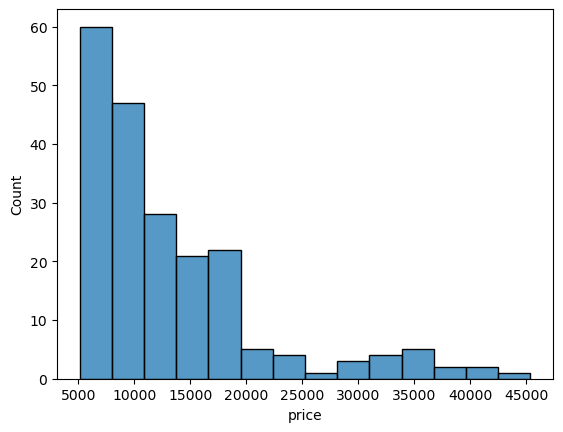

In [5]:
#let's plot the price to see distribution
sns.histplot(df['price'])

As we can see the graph above, distribution of the price is right-skewed. It is known that tail region possible behave like outlier, it can negatively affect the performance of the model. In this case, log-linear regression model might fit better in comparison to simple linear regression.


## Data Cleaning and Manipulation

Data cleaning and transformation is performed in this part of the project. It is very important process to improve the performance of the model to get high quality of information.


Below, we seperate CarName column as brand and model to make interpretation more clear.

In [6]:
df.CarName.values[0:10]
df['Brand'] = df.CarName.str.split(' ').str.get(0).str.upper()
df['Model'] = df.CarName.str.split(' ').str.get(1).str.upper()
len(set(df.Brand.values))
df.drop(columns=["CarName"], axis=1, inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA,ROMERO
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA,ROMERO
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA,ROMERO
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,100LS
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO,145E(SW)
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO,144EA
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO,244DL
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO,246


After seperating the model and brand of the cars, we check if there is any incorrect spelling on our data.

In [7]:
df.Brand.unique()


array(['ALFA', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'PORCSHCE', 'RENAULT',
       'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA', 'VOKSWAGEN', 'VOLKSWAGEN',
       'VW', 'VOLVO'], dtype=object)

As we found multiple incorrect spelling on name of the brands, we correct brand names in dataframe as below.

In [8]:
# We have 5 car brand names which is spelled incorrectly. 
Brand_dict = {
    'TOYOUTA': 'TOYOTA',
    'MAXDA': 'MAZDA',
    'PORSCHE': 'PORCSHCE',
    'VOKSWAGEN': 'VOLKSWAGEN',
    'VW': 'VOLKSWAGEN',
}

# Correcting brand name in dataframe
df['Brand'] = df['Brand'].map(Brand_dict).fillna(df['Brand'])
# Let's test again if all corrected
df.Brand.unique()

array(['ALFA', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU',
       'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI', 'NISSAN',
       'PEUGEOT', 'PLYMOUTH', 'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

Symboling indicates insurance risk rating in our dataset. When a value of +3 shows highest risk, a value of -3 shows least risk. We seperate risk rates as high, medium and low risk by using lambda function.

In [9]:
df['RiskRate'] = df['symboling'].apply(lambda x : "High Risk" if x > 1 
                                                     else ("Medium Risk" if 0 <= x <= 1
                                                        else "Low Risk"))
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model,RiskRate
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,ALFA,ROMERO,High Risk
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,ALFA,ROMERO,High Risk
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,ALFA,ROMERO,Medium Risk
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,AUDI,100LS,High Risk
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,AUDI,100LS,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114,5400,23,28,16845.0,VOLVO,145E(SW),Low Risk
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160,5300,19,25,19045.0,VOLVO,144EA,Low Risk
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134,5500,18,23,21485.0,VOLVO,244DL,Low Risk
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106,4800,26,27,22470.0,VOLVO,246,Low Risk


# Feature Analysis

In this part of the project, feature analysis is performed by creating plots for feature distributions based on the prices.

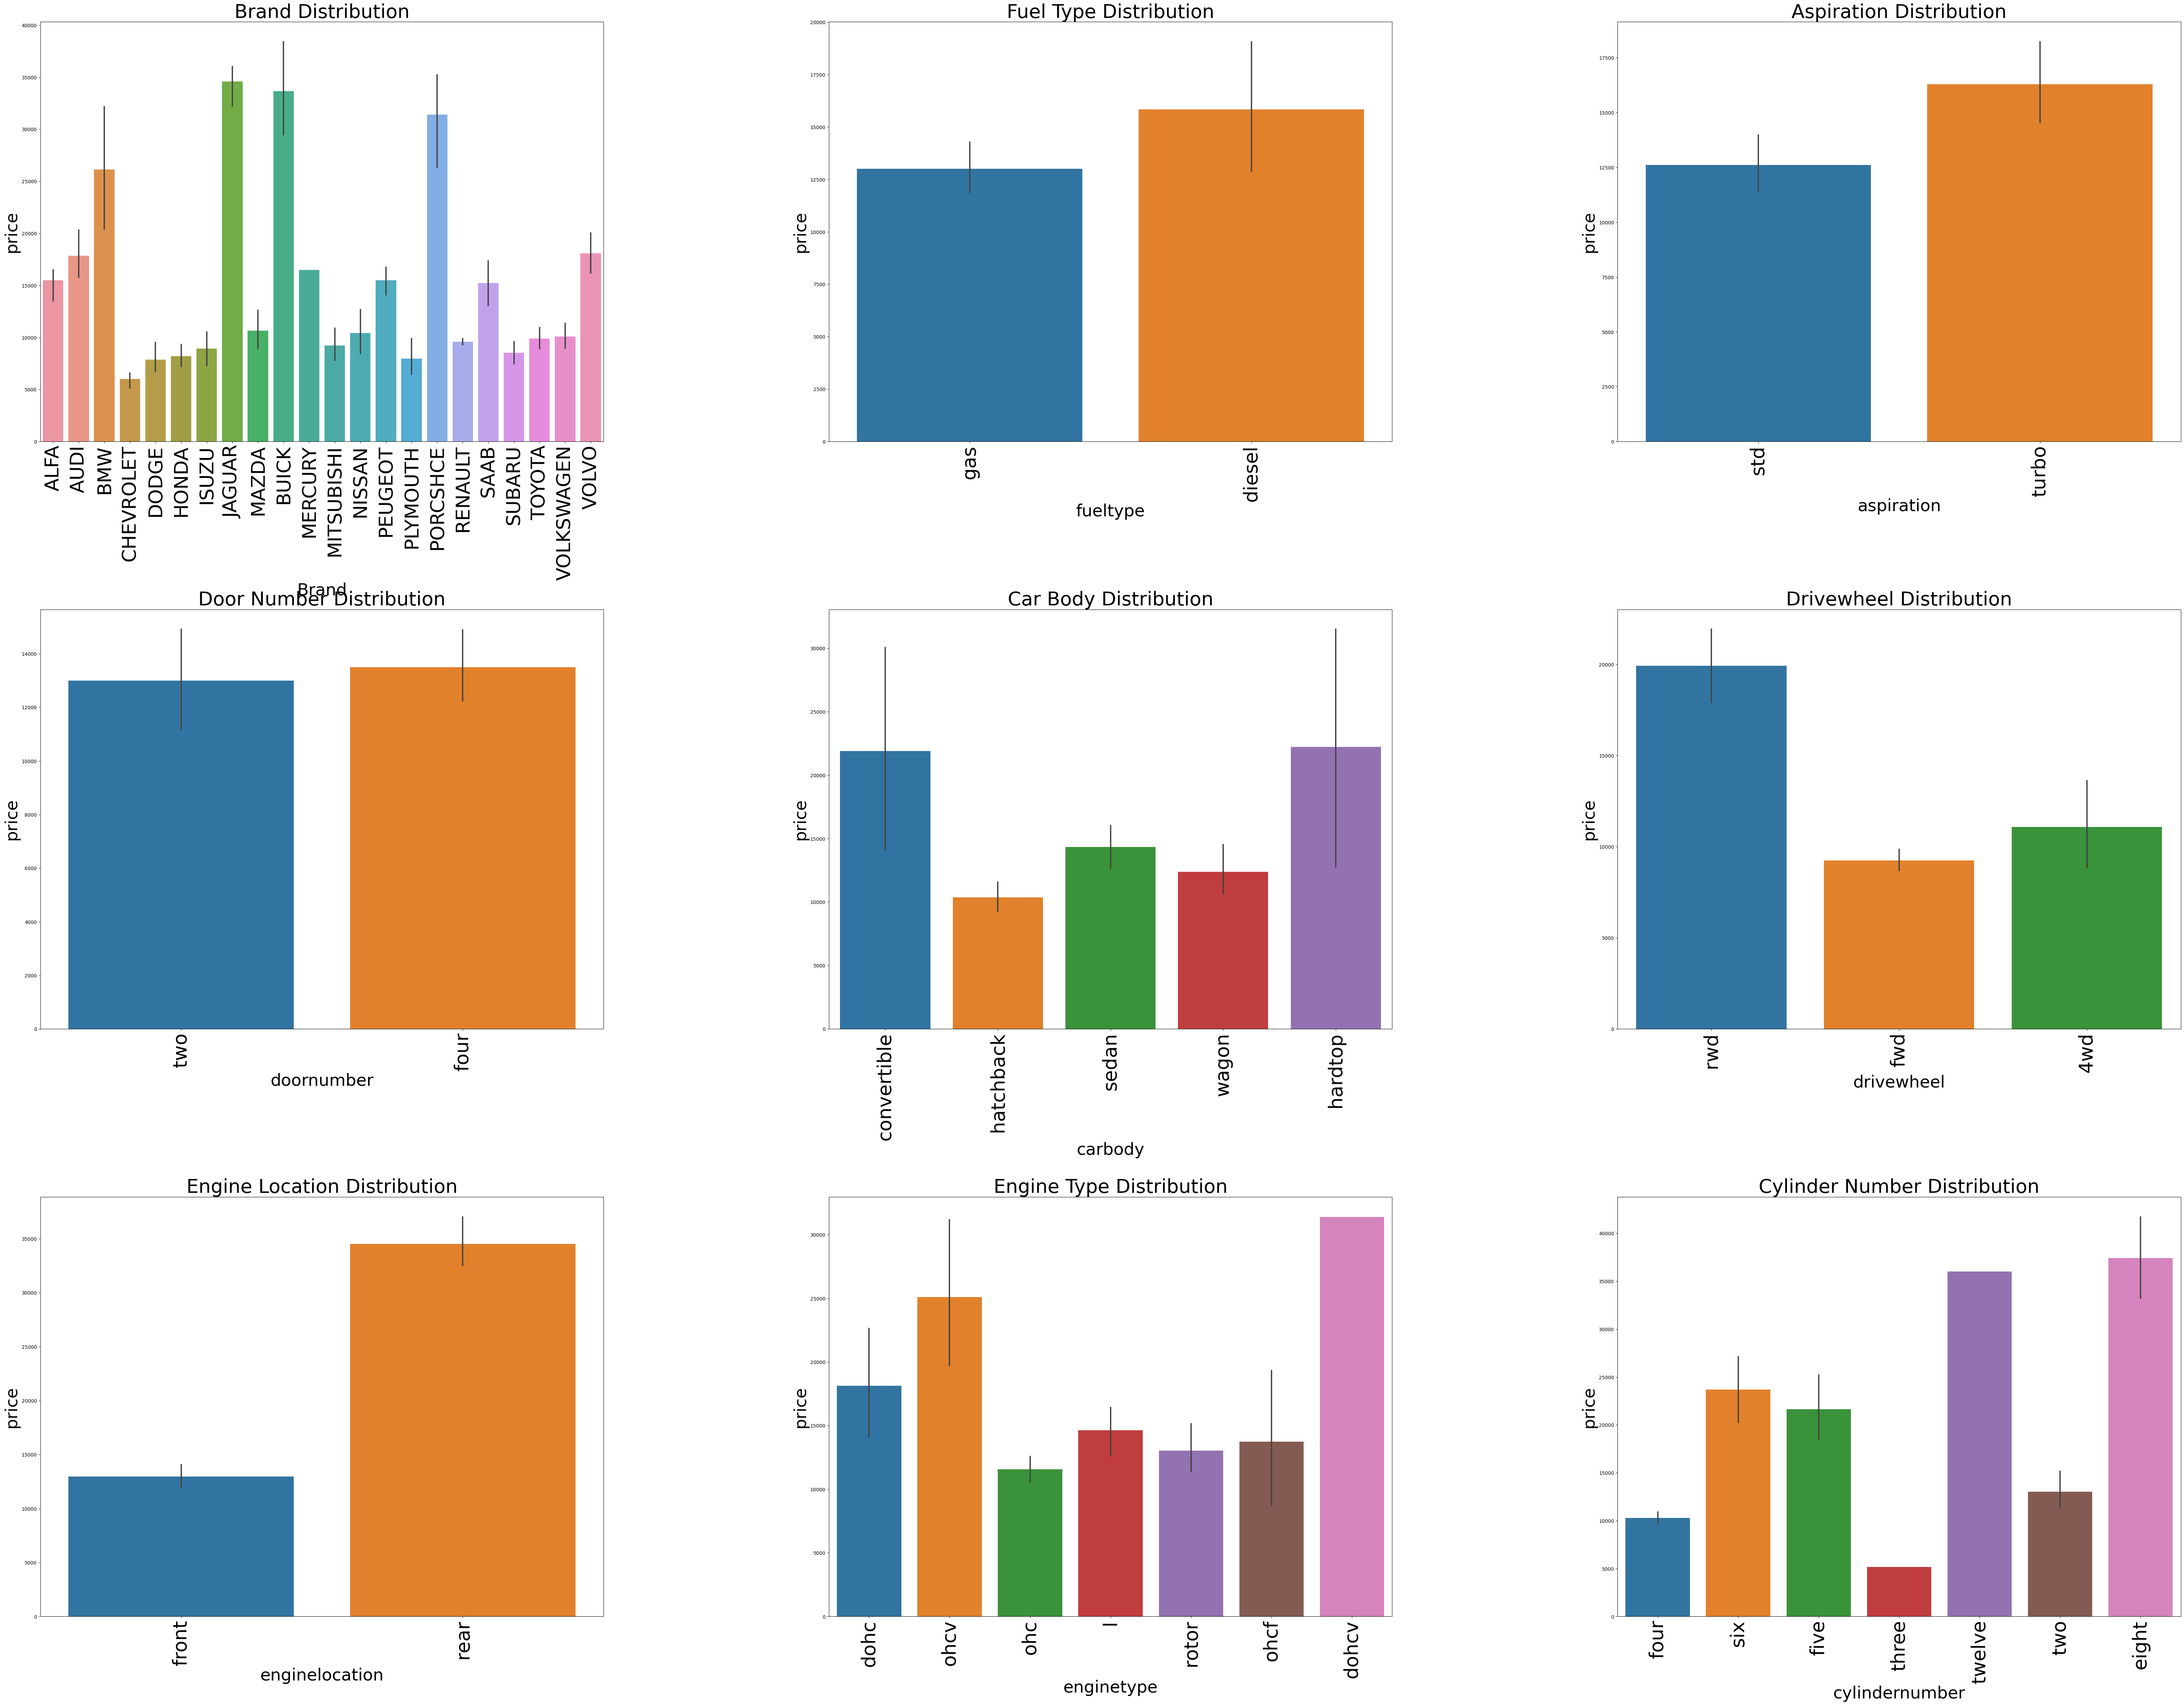

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(80, 60))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

charts = [
    {'title': "Brand Distribution", 'x': 'Brand', 'y': 'price'},
    {'title': "Fuel Type Distribution", 'x': 'fueltype', 'y': 'price'},
    {'title': "Aspiration Distribution", 'x': 'aspiration', 'y': 'price'},
    {'title': "Door Number Distribution", 'x': 'doornumber', 'y': 'price'},
    {'title': "Car Body Distribution", 'x': 'carbody', 'y': 'price'},
    {'title': "Drivewheel Distribution", 'x': 'drivewheel', 'y': 'price'},
    {'title': "Engine Location Distribution", 'x': 'enginelocation', 'y': 'price'},
    {'title': "Engine Type Distribution", 'x': 'enginetype', 'y': 'price'},
    {'title': "Cylinder Number Distribution", 'x': 'cylindernumber', 'y': 'price'},
    {'title': "Fuel System Distribution", 'x': 'fuelsystem', 'y': 'price'},
    {'title': "Risk Rate Distribution", 'x': 'RiskRate', 'y': 'price'}
]

counter = 0

for i in range(3):
    for j in range(3):
        if counter < len(charts):
            chart = charts[counter]
            plt.subplot(3, 3, counter+1)
            plt.title(chart['title'], fontsize=40)
            sns.barplot(x=chart['x'], y=chart['y'], data=df)
            plt.xlabel(chart['x'], fontsize=35)
            plt.ylabel(chart['y'], fontsize=35)
            plt.xticks(fontsize=40, rotation=90)
        else:
            axes[i, j].axis('off')
        counter += 1


plt.rcParams['figure.figsize'] = (190, 180)

plt.show()


The plot of brand distribution shows that Jaguar, Buck, Porcshce have the highest priced brands. BMW, Audi, Volvo and Alfa follows them. The rest of the brand has usually have much lower prices in comparison to higher priced brands.

It also can be seen that fuel type of diesel is more expensive than gas type and turbo aspiration is tend to be more expensive than std aspiration.

Door number and car body distribution plots indicate that four door cars have slightly higher prices than two door, rwd drivewheel cars have much higher prices and 4wd and fwd follows it respectively.

Additionally, cars with engine location as rear has far higher prices than front, dohcv as engine type has highest prices which followed by ohcv and cars with twelve and eight cylinder number have highest and almost same prices followed by six and five cylinder number cars.

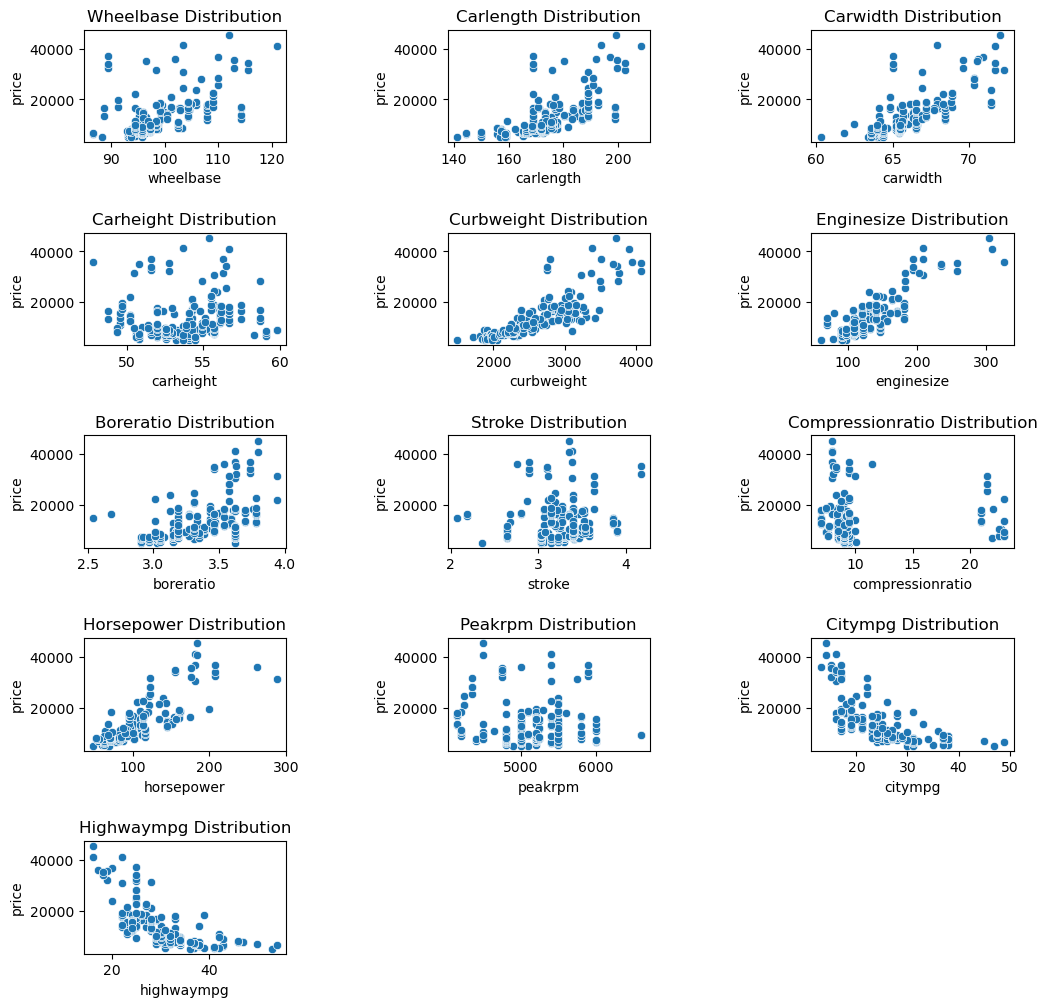

In [11]:

columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
           'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
           'citympg', 'highwaympg']


num_plots = len(columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)

for i, col in enumerate(columns):
    row = i // num_cols
    col = df[col]  
    
    ax = axes[row, i % num_cols]
    ax.set_title(col.name.capitalize() + " Distribution")
    sns.scatterplot(x=col, y='price', data=df, ax=ax)


if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        fig.delaxes(axes[-1, j])


plt.show()


Above plots shows the distribution of rest of the features based on prices.

We can say that wheel base, car lenght, car width, curb weight, engine size, bore ratio and horse power have positive correlation with price. It means when the value of these features increase, price also tends to increase.

However, city mpg and highway mpg shows different results as there are negative correlation between these features and price. Price tends to decreases when the value of high way mpg and city mpg increase.


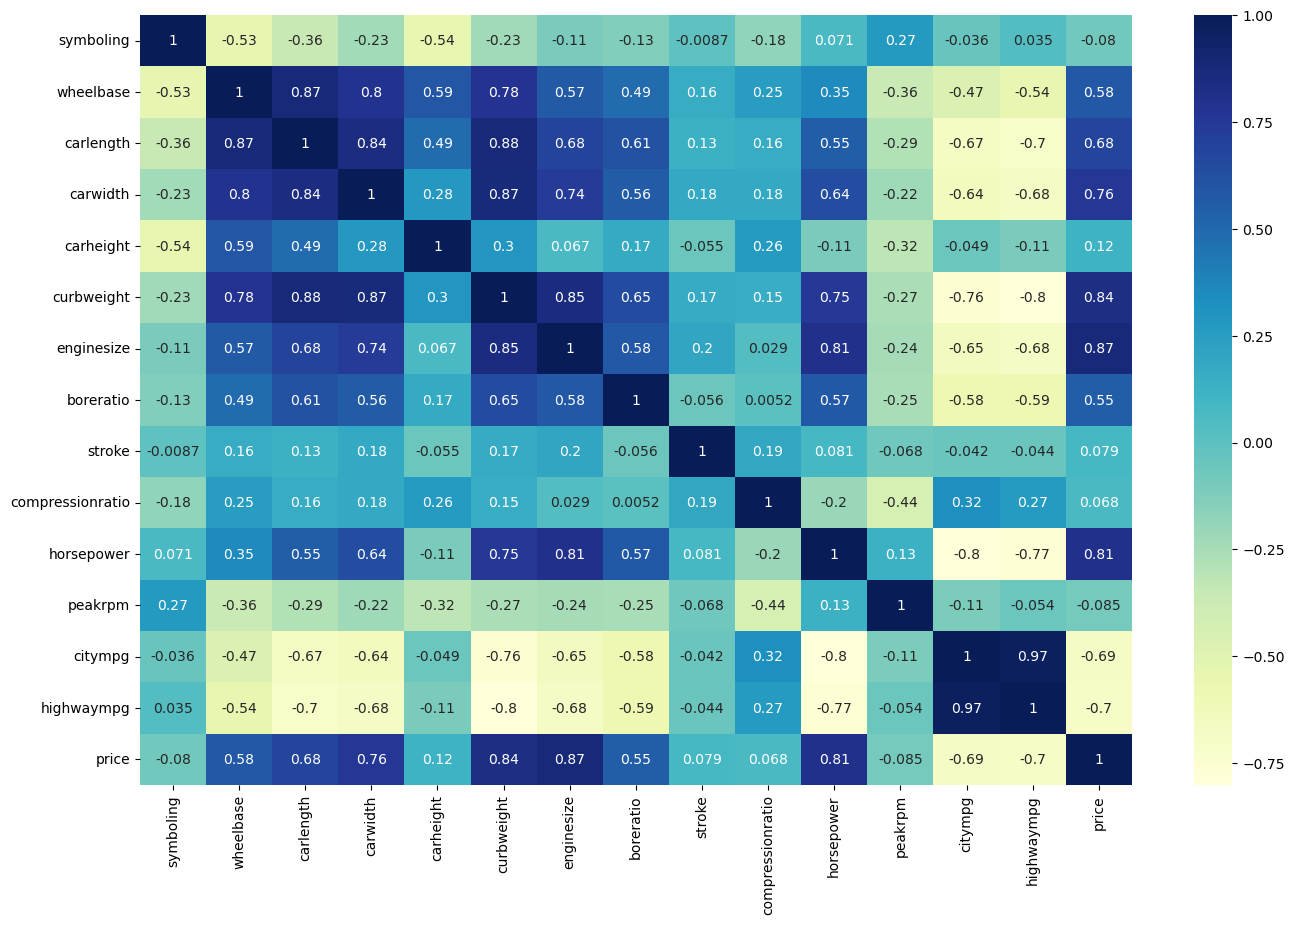

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Above, we create correlation matrix to see the correlation between features.

As it seems from corellation matrix, there are independent variables which have significant correlation between each other. As it will cause negative affect on fitting the model, using all of them in regression model will mislead the result.


# Outlier Check and Treatment

Outliers indicates data points which are significantly different than others. They can occur by error on data or naturally by the type of data. They can cause problems for model fitting and mislead on performance on the model.

In this part of the project, we check if data contains outliers and treat them.

We first list all numeric variables in dataframe carprice.

In [13]:
#Outlier treatment of quantitative variables
#listing all the numeric variables in dataframe carprice
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continues_columns = df.select_dtypes(exclude=['object', 'category']).columns
print("\033[1mCategorical\033[0m")
print(categorical_columns)
print("\033[1mContinues\033[0m")
print(continues_columns)


Categorical
Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'Brand',
       'Model', 'RiskRate'],
      dtype='object')
Continues
Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


Below, we check outliers for continues data by calculating lower and upper boundaries and remove them.

In [14]:
#checking for outliers in continues column and removing them 
for column in continues_columns:
    # Calculate the lower and upper boundaries for outliers
    lb = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    ub = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    
    # Assign highest and lowest values to outliers
    df.loc[df[column] < lb, column] = lb
    df.loc[df[column] > ub, column] = ub

Then we check if it causes any NA on price data.

In [15]:
#checking for any NA induction during outlier treatment
df['price'].isnull().sum() # if output is 0, it means there is not any NaN value

0

As next step, we transform categorical variables into numerical format before creating model and scaling continuos columns to make interpretation easier. Then, we concatenate the encoded data with the numerical data.

In [16]:
# OneHotEncoder cateogerical values  
encoder = OneHotEncoder(sparse_output=False)
Edata = encoder.fit_transform(df[categorical_columns])
E_df = pd.DataFrame(Edata, columns=encoder.get_feature_names_out(categorical_columns))

#Scaling the continuous columns
scaler = StandardScaler()
Sdata = scaler.fit_transform(df[continues_columns])
S_df=pd.DataFrame(Sdata, columns=continues_columns)
# Concatenate the encoded data with the numerical data from df
df_fit = pd.concat([S_df, E_df], axis=1)
print(df_fit)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.743470  -1.723005  -0.426521 -0.858695  -2.020417   -0.014566   
1     1.743470  -1.723005  -0.426521 -0.858695  -2.020417   -0.014566   
2     0.133509  -0.717590  -0.231513 -0.184978  -0.543527    0.514882   
3     0.938490   0.185580   0.207256  0.151880   0.235942   -0.420797   
4     0.938490   0.117416   0.207256  0.248125   0.235942    0.516807   
..         ...        ...        ...       ...        ...         ...   
200  -1.476452   1.770387   1.198549  1.451189   0.728239    0.763241   
201  -1.476452   1.770387   1.198549  1.403066   0.728239    0.949992   
202  -1.476452   1.770387   1.198549  1.451189   0.728239    0.878757   
203  -1.476452   1.770387   1.198549  1.451189   0.728239    1.273437   
204  -1.476452   1.770387   1.198549  1.451189   0.728239    0.975021   

     enginesize  boreratio    stroke  compressionratio  ...  Model_X4  \
0      0.160196   0.519071 -2.106623         -0.04

# Linear Regression Modelling

In this part of the project, we start to create our linear regression model to see how independent variable affect dependent variable.

First, we divide our data as train and test with percentage 70% and 30% respectively.

In [17]:
# Let's randomly divide data two part -70% training 30% testing
df_random = df_fit.sample(frac=1, random_state=42)
Div_index = int(0.7 * len(df_random))
train_df = df_random[:Div_index]
test_df = df_random[Div_index:]

Then, we create our first model with all features.

In [18]:
#Linear Regression modelling
y = train_df['price']
X = train_df.drop('price', axis=1)

# Model with all features
model_1 = sm.OLS(y, X)
result = model_1.fit()
result.summary()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                nan
Time:                        21:45:14   Log-Likelihood:                 4510.6
No. Observations:                 143   AIC:                            -8735.
Df Residuals:                       0   BIC:                            -8311.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
symboling                         -0.1150        inf         -0        nan         nan         nan
wheelbase                          0.0854        inf          0        nan         nan         nan
carlength                         -0.3854        inf         -0        nan         nan         nan
carwidth                           0.3459        inf          0        nan         nan         nan
carheight                         -0.6115        inf         -0        nan         nan         nan
curbweight                         1.9080        inf          0        nan         nan         nan
enginesize                        -1.7104        inf         -0        nan         nan         nan
boreratio                          0.0916        inf          0        nan         nan         nan
stroke                             0.0821        inf          0        nan         nan         nan
compressionratio                   0.0760        inf          0        nan         nan         nan
horsepower                        -0.0141        inf         -0        nan         nan         nan
peakrpm                           -0.5705        inf         -0        nan         nan         nan
citympg                            0.1573        inf          0        nan         nan         nan
highwaympg                        -0.2842        inf         -0        nan         nan         nan
fueltype_diesel                   -0.0812        inf         -0        nan         nan         nan
fueltype_gas                       0.1692        inf          0        nan         nan         nan
aspiration_std                    -0.0088        inf         -0        nan         nan         nan
aspiration_turbo                   0.0968        inf          0        nan         nan         nan
doornumber_four                   -0.0132        inf         -0        nan         nan         nan
doornumber_two                     0.1012        inf          0        nan         nan         nan
carbody_convertible                0.4809        inf          0        nan         nan         nan
carbody_hardtop                   -0.3232        inf         -0        nan         nan         nan
carbody_hatchback                  0.0316        inf          0        nan         nan         nan
carbody_sedan                      0.1067        inf          0        nan         nan         nan
carbody_wagon                     -0.2079        inf         -0        nan         nan         nan
drivewheel_4wd                     0.1681        inf          0        nan         nan         nan
drivewheel_fwd                     0.0713        inf          0        nan         nan         nan
drivewheel_rwd                    -0.1515        inf         -0        nan         nan         nan
enginelocation

As we see, model R2 is 1. which means model perfectly explain price, while Adj. R-squared is nan. it is result of lack of degree of freedom. We have 143 observarions and 217 different independed variables. We should eliminate all the variables which we can not reject hypotesis that their coefficient is not 0. 
for that purpose we use stepwise_regression library. (jupyter is unable to install and call functions of stepwise_regression. so, we manually added them here)

In [19]:
# library taken from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [20]:
# Step_wise selection of significant features
dfc = train_df

# Separate features and target
X = dfc.drop('price', axis=1)
y = dfc['price']
forward_regression = forward_regression(X, y, 0.025)
print("Selected Features (forward_regression):")
print(forward_regression)


Selected Features (forward_regression):
['enginesize', 'curbweight', 'Brand_PORCSHCE', 'Brand_BMW', 'cylindernumber_four', 'Brand_BUICK', 'horsepower', 'Model_RX-7', 'carbody_sedan', 'Model_DAYZ', 'carbody_convertible', 'wheelbase', 'highwaympg', 'Brand_SAAB', 'Model_504(SW)', 'Model_304', 'Model_CENTURY']


Below features are selected as a result of Step_wise selection:
['enginesize', 'curbweight', 'Brand_PORCSHCE', 'Brand_BMW', 'cylindernumber_four', 'Brand_BUICK', 'horsepower', 'Model_RX-7', 'carbody_sedan', 'Model_DAYZ', 'carbody_convertible', 'wheelbase', 'highwaympg', 'Brand_SAAB', 'Model_504(SW)', 'Model_304', 'Model_CENTURY']

In [21]:
#Model_2 - All the features selected from step_wise selection
y = train_df['price']
X2= train_df.loc[:,forward_regression]

# Model with all features
model_2 = sm.OLS(y, X2)
result2 = model_2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              170.4
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    3.07e-78
Time:                        21:45:34   Log-Likelihood:                          30.845
No. Observations:                 143   AIC:                                     -27.69
Df Residuals:                     126   BIC:                                      22.68
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
enginesize             -0.0470      0.053     -0.886      0.377      -0.152       0.058
curbweight              0.4104      0.061      6.688      0.000       0.289       0.532
Brand_PORCSHCE          1.6595      0.131     12.672      0.000       1.400       1.919
Brand_BMW               0.8947      0.104      8.643      0.000       0.690       1.100
cylindernumber_four    -0.2927      0.029    -10.002      0.000      -0.351      -0.235
Brand_BUICK             0.7730      0.122      6.332      0.000       0.531       1.015
horsepower              0.3427      0.051      6.711      0.000       0.242       0.444
Model_RX-7              0.8307      0.216      3.849      0.000       0.404       1.258
carbody_sedan           0.1912      0.037      5.216      0.000       0.119       0.264
Model_DAYZ             -0.8122      0.216     -3.758      0.000      -1.240      -0.384
carbody_convertible     0.5231      0.113      4.614      0.000       0.299       0.748
wheelbase               0.1447      0.038      3.846      0.000       0.070       0.219
highwaympg              0.1103      0.039      2.840      0.005       0.033       0.187
Brand_SAAB              0.2431      0.116      2.102      0.038       0.014       0.472
Model_504(SW)          -0.5198      0.223     -2.336      0.021      -0.960      -0.079
Model_304              -0.5016      0.217     -2.310      0.023      -0.931      -0.072
Model_CENTURY           0.5583      0.235      2.375      0.019       0.093       1.023
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.466
Skew:                           0.139   Prob(JB):                        0.792
Kurtosis:                       3.034   Cond. No.                         26.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 of the model is 95% -high but we still have features with insignificant  coefficients. so, we remove variables with highest p value - enginesize in Model 3

In [22]:
#Model 3
y = train_df['price']
X3= X2.drop('enginesize', axis=1)
model_3 = sm.OLS(y, X3)
result3 = model_3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              181.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    3.30e-79
Time:                        21:45:34   Log-Likelihood:                          30.401
No. Observations:                 143   AIC:                                     -28.80
Df Residuals:                     127   BIC:                                      18.60
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.3847      0.054      7.124      0.000       0.278       0.492
Brand_PORCSHCE          1.6317      0.127     12.844      0.000       1.380       1.883
Brand_BMW               0.8781      0.102      8.633      0.000       0.677       1.079
cylindernumber_four    -0.2882      0.029    -10.008      0.000      -0.345      -0.231
Brand_BUICK             0.7562      0.120      6.276      0.000       0.518       0.995
horsepower              0.3179      0.043      7.449      0.000       0.233       0.402
Model_RX-7              0.8151      0.215      3.793      0.000       0.390       1.240
carbody_sedan           0.1883      0.036      5.162      0.000       0.116       0.261
Model_DAYZ             -0.8405      0.214     -3.935      0.000      -1.263      -0.418
carbody_convertible     0.5142      0.113      4.557      0.000       0.291       0.737
wheelbase               0.1447      0.038      3.849      0.000       0.070       0.219
highwaympg              0.0995      0.037      2.700      0.008       0.027       0.172
Brand_SAAB              0.2720      0.111      2.453      0.016       0.053       0.491
Model_504(SW)          -0.4995      0.221     -2.259      0.026      -0.937      -0.062
Model_304              -0.5111      0.217     -2.358      0.020      -0.940      -0.082
Model_CENTURY           0.5456      0.234      2.328      0.022       0.082       1.009
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.163
Skew:                           0.080   Prob(JB):                        0.922
Kurtosis:                       3.038   Cond. No.                         24.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Model 4
y = train_df['price']
X4= X3.drop('Model_504(SW)', axis=1)
model_4 = sm.OLS(y, X4)
result4 = model_4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              187.0
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    2.86e-79
Time:                        21:45:34   Log-Likelihood:                          27.585
No. Observations:                 143   AIC:                                     -25.17
Df Residuals:                     128   BIC:                                      19.27
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.3868      0.055      7.054      0.000       0.278       0.495
Brand_PORCSHCE          1.6008      0.128     12.476      0.000       1.347       1.855
Brand_BMW               0.8754      0.103      8.472      0.000       0.671       1.080
cylindernumber_four    -0.2994      0.029    -10.392      0.000      -0.356      -0.242
Brand_BUICK             0.7794      0.122      6.391      0.000       0.538       1.021
horsepower              0.3250      0.043      7.518      0.000       0.239       0.411
Model_RX-7              0.8315      0.218      3.811      0.000       0.400       1.263
carbody_sedan           0.2007      0.037      5.479      0.000       0.128       0.273
Model_DAYZ             -0.8539      0.217     -3.937      0.000      -1.283      -0.425
carbody_convertible     0.5102      0.115      4.452      0.000       0.283       0.737
wheelbase               0.1276      0.037      3.413      0.001       0.054       0.202
highwaympg              0.1043      0.037      2.791      0.006       0.030       0.178
Brand_SAAB              0.2734      0.113      2.428      0.017       0.051       0.496
Model_304              -0.4884      0.220     -2.221      0.028      -0.924      -0.053
Model_CENTURY           0.5416      0.238      2.275      0.025       0.070       1.013
==============================================================================
Omnibus:                        0.237   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.094
Skew:                           0.059   Prob(JB):                        0.954
Kurtosis:                       3.041   Cond. No.                         23.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Model 5
y = train_df['price']
X5= X4.drop('Model_304', axis=1)
model_5 = sm.OLS(y, X5)
result5 = model_5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              194.1
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    2.23e-79
Time:                        21:45:34   Log-Likelihood:                          24.882
No. Observations:                 143   AIC:                                     -21.76
Df Residuals:                     129   BIC:                                      19.72
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.3667      0.055      6.679      0.000       0.258       0.475
Brand_PORCSHCE          1.5947      0.130     12.247      0.000       1.337       1.852
Brand_BMW               0.8813      0.105      8.405      0.000       0.674       1.089
cylindernumber_four    -0.3038      0.029    -10.410      0.000      -0.361      -0.246
Brand_BUICK             0.8129      0.123      6.616      0.000       0.570       1.056
horsepower              0.3278      0.044      7.472      0.000       0.241       0.415
Model_RX-7              0.8636      0.221      3.908      0.000       0.426       1.301
carbody_sedan           0.1962      0.037      5.283      0.000       0.123       0.270
Model_DAYZ             -0.8474      0.220     -3.849      0.000      -1.283      -0.412
carbody_convertible     0.5111      0.116      4.392      0.000       0.281       0.741
wheelbase               0.1272      0.038      3.350      0.001       0.052       0.202
highwaympg              0.0926      0.038      2.464      0.015       0.018       0.167
Brand_SAAB              0.2793      0.114      2.444      0.016       0.053       0.505
Model_CENTURY           0.5337      0.242      2.208      0.029       0.055       1.012
==============================================================================
Omnibus:                        0.316   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.122
Skew:                           0.060   Prob(JB):                        0.941
Kurtosis:                       3.077   Cond. No.                         23.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Model 6
y = train_df['price']
X6= X5.drop('Model_CENTURY', axis=1)
model_6 = sm.OLS(y, X6)
result6 = model_6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              202.6
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    1.66e-79
Time:                        21:45:34   Log-Likelihood:                          22.229
No. Observations:                 143   AIC:                                     -18.46
Df Residuals:                     130   BIC:                                      20.06
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.3725      0.056      6.692      0.000       0.262       0.483
Brand_PORCSHCE          1.5944      0.132     12.066      0.000       1.333       1.856
Brand_BMW               0.8923      0.106      8.395      0.000       0.682       1.103
cylindernumber_four    -0.3011      0.030    -10.177      0.000      -0.360      -0.243
Brand_BUICK             0.9271      0.113      8.198      0.000       0.703       1.151
horsepower              0.3224      0.044      7.253      0.000       0.234       0.410
Model_RX-7              0.8711      0.224      3.884      0.000       0.427       1.315
carbody_sedan           0.1886      0.038      5.027      0.000       0.114       0.263
Model_DAYZ             -0.8392      0.223     -3.757      0.000      -1.281      -0.397
carbody_convertible     0.5046      0.118      4.275      0.000       0.271       0.738
wheelbase               0.1211      0.038      3.151      0.002       0.045       0.197
highwaympg              0.0905      0.038      2.376      0.019       0.015       0.166
Brand_SAAB              0.2823      0.116      2.434      0.016       0.053       0.512
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.210
Skew:                           0.075   Prob(JB):                        0.900
Kurtosis:                       3.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Model 7
y = train_df['price']
X7= X6.drop('highwaympg', axis=1)
model_7 = sm.OLS(y, X7)
result7 = model_7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              211.5
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    1.75e-79
Time:                        21:45:34   Log-Likelihood:                          19.189
No. Observations:                 143   AIC:                                     -14.38
Df Residuals:                     131   BIC:                                      21.18
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.3456      0.055      6.232      0.000       0.236       0.455
Brand_PORCSHCE          1.6416      0.133     12.349      0.000       1.379       1.905
Brand_BMW               0.9032      0.108      8.358      0.000       0.689       1.117
cylindernumber_four    -0.3062      0.030    -10.199      0.000      -0.366      -0.247
Brand_BUICK             0.9566      0.114      8.364      0.000       0.730       1.183
horsepower              0.2653      0.038      6.971      0.000       0.190       0.341
Model_RX-7              0.9552      0.225      4.239      0.000       0.509       1.401
carbody_sedan           0.1918      0.038      5.028      0.000       0.116       0.267
Model_DAYZ             -0.8503      0.227     -3.741      0.000      -1.300      -0.401
carbody_convertible     0.4869      0.120      4.062      0.000       0.250       0.724
wheelbase               0.1103      0.039      2.841      0.005       0.034       0.187
Brand_SAAB              0.2992      0.118      2.540      0.012       0.066       0.532
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.399
Skew:                           0.116   Prob(JB):                        0.819
Kurtosis:                       3.116   Cond. No.                         18.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Model 8
y = train_df['price']
X8= X7.drop('Brand_SAAB', axis=1)
model_8 = sm.OLS(y, X8)
result8 = model_8.fit()
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              221.0
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    2.65e-79
Time:                        21:45:34   Log-Likelihood:                          15.751
No. Observations:                 143   AIC:                                     -9.503
Df Residuals:                     132   BIC:                                      23.09
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.3437      0.057      6.075      0.000       0.232       0.456
Brand_PORCSHCE          1.5975      0.134     11.878      0.000       1.331       1.864
Brand_BMW               0.8774      0.110      7.992      0.000       0.660       1.095
cylindernumber_four    -0.2887      0.030     -9.682      0.000      -0.348      -0.230
Brand_BUICK             0.9470      0.117      8.118      0.000       0.716       1.178
horsepower              0.2857      0.038      7.528      0.000       0.211       0.361
Model_RX-7              0.9574      0.230      4.164      0.000       0.503       1.412
carbody_sedan           0.1932      0.039      4.963      0.000       0.116       0.270
Model_DAYZ             -0.8772      0.232     -3.787      0.000      -1.335      -0.419
carbody_convertible     0.4693      0.122      3.843      0.000       0.228       0.711
wheelbase               0.1076      0.040      2.717      0.007       0.029       0.186
==============================================================================
Omnibus:                        0.271   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.200
Skew:                           0.091   Prob(JB):                        0.905
Kurtosis:                       2.983   Cond. No.                         18.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Model 9
y = train_df['price']
X9= X8.drop('wheelbase', axis=1)
model_9 = sm.OLS(y, X9)
result9 = model_9.fit()
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              231.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    6.06e-79
Time:                        21:45:34   Log-Likelihood:                          11.861
No. Observations:                 143   AIC:                                     -3.722
Df Residuals:                     133   BIC:                                      25.91
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.4650      0.036     13.071      0.000       0.395       0.535
Brand_PORCSHCE          1.5113      0.134     11.296      0.000       1.247       1.776
Brand_BMW               0.9029      0.112      8.063      0.000       0.681       1.124
cylindernumber_four    -0.2926      0.030     -9.598      0.000      -0.353      -0.232
Brand_BUICK             0.9379      0.119      7.857      0.000       0.702       1.174
horsepower              0.2410      0.035      6.883      0.000       0.172       0.310
Model_RX-7              0.9824      0.235      4.177      0.000       0.517       1.448
carbody_sedan           0.2131      0.039      5.445      0.000       0.136       0.291
Model_DAYZ             -0.9302      0.236     -3.937      0.000      -1.398      -0.463
carbody_convertible     0.3923      0.122      3.226      0.002       0.152       0.633
==============================================================================
Omnibus:                        1.000   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.698
Skew:                           0.159   Prob(JB):                        0.705
Kurtosis:                       3.127   Cond. No.                         16.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Model 10
y = train_df['price']
X10= X9.drop('carbody_convertible', axis=1)
model_10 = sm.OLS(y, X10)
result10 = model_10.fit()
result10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              239.1
Date:                Wed, 07 Jun 2023   Prob (F-statistic):                    5.60e-78
Time:                        21:45:35   Log-Likelihood:                          6.4740
No. Observations:                 143   AIC:                                      5.052
Df Residuals:                     134   BIC:                                      31.72
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
curbweight              0.4674      0.037     12.704      0.000       0.395       0.540
Brand_PORCSHCE          1.5912      0.136     11.698      0.000       1.322       1.860
Brand_BMW               0.9022      0.116      7.788      0.000       0.673       1.131
cylindernumber_four    -0.2736      0.031     -8.842      0.000      -0.335      -0.212
Brand_BUICK             0.9355      0.123      7.576      0.000       0.691       1.180
horsepower              0.2472      0.036      6.833      0.000       0.176       0.319
Model_RX-7              0.9822      0.243      4.036      0.000       0.501       1.463
carbody_sedan           0.1990      0.040      4.946      0.000       0.119       0.279
Model_DAYZ             -0.9271      0.244     -3.793      0.000      -1.411      -0.444
==============================================================================
Omnibus:                        0.807   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.608
Skew:                           0.158   Prob(JB):                        0.738
Kurtosis:                       3.051   Cond. No.                         16.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Predict the target variable
Columns=X10.columns
y_test = test_df['price']
X_test= test_df[Columns]
y_pred = result10.predict(X_test)

# Calculate RMSE
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.3339702806123851


In [31]:
dflr=train_df
# Separate features and target
X =dflr.drop('price', axis=1)
y = dflr['price']

# Create and fit a linear regression model
model1 = LinearRegression()
model1.fit(X, y)

# For below part we asked for help of ChatGPT

model = LinearRegression()


# Perform feature selection with cross-validation
rfecv = RFECV(estimator=model)
X_selected = rfecv.fit_transform(X, y)

# Perform cross-validation on the selected features
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average R^2:", cv_scores.mean())

# Get the selected features 
selected_features = X.columns[rfecv.support_]


# Print the selected features
print("Selected Features:", selected_features)




Cross-validation scores: [-2.16461778e+24  6.19885405e-02 -4.19269120e+00  4.78329829e-01
 -6.86144312e+21]
Average R^2: -4.342958443724845e+23
Selected Features: Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'peakrpm', 'citympg',
       ...
       'Model_TRIBECA', 'Model_VALIANT', 'Model_X1', 'Model_X4', 'Model_X5',
       'Model_XJ', 'Model_nan', 'RiskRate_High Risk', 'RiskRate_Low Risk',
       'RiskRate_Medium Risk'],
      dtype='object', length=146)


In [32]:
x_t=test_df.drop('price', axis=1)
x_test=rfecv.transform(x_t)
y_test=test_df['price']
model.fit(x_test, y_test)
ypredict=model.predict(x_test)
mse = mean_squared_error(y_test, ypredict)
print("RMSE:", mse**0.5)

RMSE: 0.05358061900876892


In [33]:
y_train1 = train_df['price']
x_train1= train_df.drop('price', axis=1)
y_test1 = test_df['price']
x_test1= test_df.drop('price', axis=1)

In [34]:
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

#number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximumnumber of levels in tree
max_depth = [2,4]

#minimum number of samples required to split a node
min_samples_split = [2, 5]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

#method of selecting samples for training each tree
bootstrap = [True,False ]


In [35]:

#Create param_grid
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [45]:
rf = RandomForestRegressor()

In [46]:

rf_grid = GridSearchCV(estimator = rf,
                 param_grid = param_grid,
                 cv = 5,
                 verbose = 2,
                n_jobs = -1)

In [47]:
rf_grid.fit(x_train1,y_train1)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [48]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 41}

In [49]:
rf_grid.best_score_

0.8904629909006505